In [1]:
import ROOT as R

Welcome to JupyROOT 6.24/00


In [2]:
files={}
files['MS3']=R.TFile("MS3/prodAnalysis_PMT.root")
files['OPT']=R.TFile("LYSO_Optimisation/prodAnalysis_PMT.root")
files['MS2']=R.TFile("MS2/prodAnalysis_PMT.root")

In [13]:
g={}
g['lyDT_MS3']=R.TGraphErrors()
g['lyAbs_MS3']=R.TGraphErrors()
g['lyNorm_MS3']=R.TGraphErrors()
g['tau_MS3']=R.TGraphErrors()
for i,vendor in enumerate([1,3,4,5,9,10]):
    g['lyDT_MS3'].SetPoint(i,i,files['MS3'].Get("h1_lyOverDT_byProd_prod%d_geo2_PREIRR"%vendor).GetMean())
    g['lyDT_MS3'].SetPointError(i,0,files['MS3'].Get("h1_lyOverDT_byProd_prod%d_geo2_PREIRR"%vendor).GetRMS())
    g['lyAbs_MS3'].SetPoint(i,i,files['MS3'].Get("h1_lyAbs_byProd_prod%d_geo2_PREIRR"%vendor).GetMean())
    g['lyAbs_MS3'].SetPointError(i,0,files['MS3'].Get("h1_lyAbs_byProd_prod%d_geo2_PREIRR"%vendor).GetRMS())
    g['lyNorm_MS3'].SetPoint(i,i,files['MS3'].Get("h1_lyNorm_byProd_prod%d_geo2_PREIRR"%vendor).GetMean())
    g['lyNorm_MS3'].SetPointError(i,0,0.03)
    g['tau_MS3'].SetPoint(i,i,files['MS3'].Get("h1_dt_byProd_prod%d_geo2_PREIRR"%vendor).GetMean())
    g['tau_MS3'].SetPointError(i,0,files['MS3'].Get("h1_dt_byProd_prod%d_geo2_PREIRR"%vendor).GetRMS())

In [14]:
g['lyDT_OPT']=R.TGraphErrors(6)
g['lyAbs_OPT']=R.TGraphErrors(6)
g['lyNorm_OPT']=R.TGraphErrors(6)
g['tau_OPT']=R.TGraphErrors(6)
for i,vendor in enumerate([1,3,4,5,10]):
    #missing vendor 9
    if (vendor==10):
        i=i+1
    g['lyDT_OPT'].SetPoint(i,i,files['OPT'].Get("h1_lyOverDT_byProd_prod%d_geo2_PREIRR"%vendor).GetMean())
    g['lyDT_OPT'].SetPointError(i,0,files['OPT'].Get("h1_lyOverDT_byProd_prod%d_geo2_PREIRR"%vendor).GetRMS())
    g['lyAbs_OPT'].SetPoint(i,i,files['OPT'].Get("h1_lyAbs_byProd_prod%d_geo2_PREIRR"%vendor).GetMean())
    g['lyAbs_OPT'].SetPointError(i,0,files['OPT'].Get("h1_lyAbs_byProd_prod%d_geo2_PREIRR"%vendor).GetRMS())
    g['lyNorm_OPT'].SetPoint(i,i,files['OPT'].Get("h1_lyNorm_byProd_prod%d_geo2_PREIRR"%vendor).GetMean())
    g['lyNorm_OPT'].SetPointError(i,0,0.05)
    g['tau_OPT'].SetPoint(i,i,files['OPT'].Get("h1_dt_byProd_prod%d_geo2_PREIRR"%vendor).GetMean())
    g['tau_OPT'].SetPointError(i,0,files['OPT'].Get("h1_dt_byProd_prod%d_geo2_PREIRR"%vendor).GetRMS())

In [5]:
c1=R.TCanvas("c1","c1",800,600)

t=R.TLatex()#pm                                                                                                                               
t.SetTextSize(0.04)

In [6]:
l=R.TLegend(0.8,0.8,0.9,0.88)
l.SetFillColorAlpha(0,0)
l.SetBorderSize(0)
l.SetTextSize(0.04)

In [15]:
for k in ['MS3','OPT']:
    for h in ['lyDT','lyAbs','lyNorm','tau']:
        g['%s_%s'%(h,k)].GetHistogram().SetBins(6,-0.5,6-0.5)
        for kk,vendor in enumerate([1,3,4,5,9,10]):
            g['%s_%s'%(h,k)].GetHistogram().GetXaxis().SetBinLabel(kk+1,'prod%d'%vendor)

Info in <TCanvas::Print>: png file plots/LYSO_OPT_lyAbs_PMT_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_lyAbs_PMT_byProd.pdf has been created


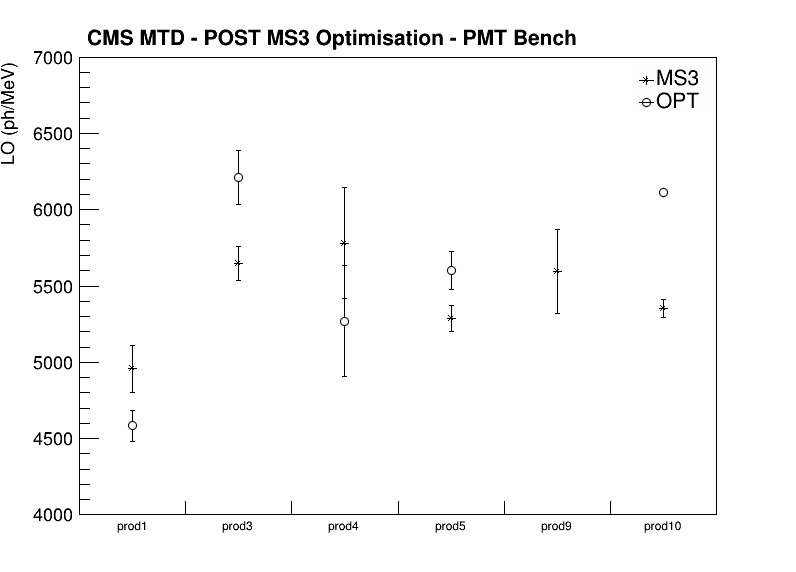

In [8]:
l.Clear()
g['lyAbs_MS3'].Draw("AP*")
l.AddEntry(g['lyAbs_MS3'],"MS3","PL")
g['lyAbs_MS3'].GetHistogram().GetYaxis().SetLimits(4000,7000)
g['lyAbs_MS3'].GetHistogram().GetYaxis().SetRangeUser(4000,7000)
g['lyAbs_MS3'].GetHistogram().GetYaxis().SetTitle("LO (ph/MeV)")
g['lyAbs_OPT'].SetMarkerStyle(24)
g['lyAbs_OPT'].SetMarkerSize(1.2)
l.AddEntry(g['lyAbs_OPT'],"OPT","PL")
g['lyAbs_OPT'].Draw("PSAME")
l.Draw()
t.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - PMT Bench')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_lyAbs_PMT_byProd.%s'%ext)

Info in <TCanvas::Print>: png file plots/LYSO_OPT_dt_PMT_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_dt_PMT_byProd.pdf has been created


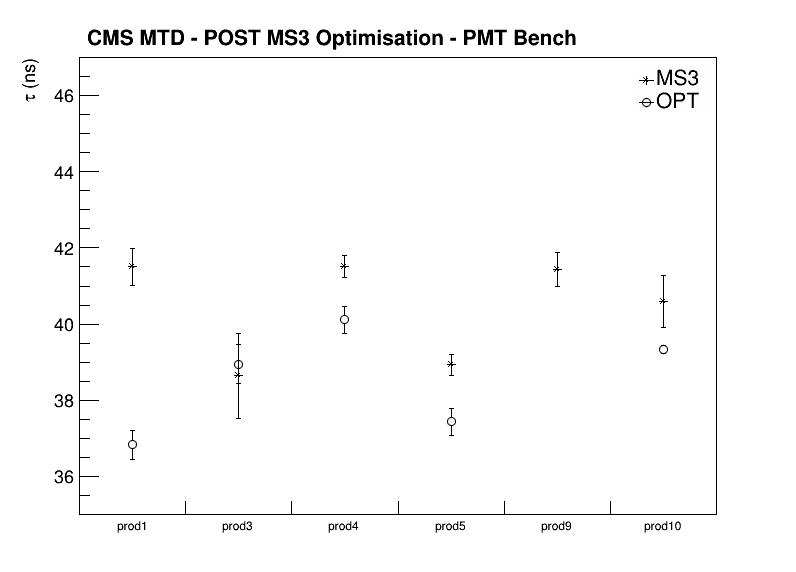

In [9]:
g['tau_MS3'].Draw("AP*")
g['tau_MS3'].GetHistogram().GetYaxis().SetLimits(35,47)
g['tau_MS3'].GetHistogram().GetYaxis().SetRangeUser(35,47)
g['tau_MS3'].GetHistogram().GetYaxis().SetTitle("#tau (ns)")
g['tau_OPT'].SetMarkerStyle(24)
g['tau_OPT'].SetMarkerSize(1.2)
g['tau_OPT'].Draw("PSAME")
l.Draw()
t.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - PMT Bench')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_dt_PMT_byProd.%s'%ext)

Info in <TCanvas::Print>: png file plots/LYSO_OPT_lyDT_PMT_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_lyDT_PMT_byProd.pdf has been created


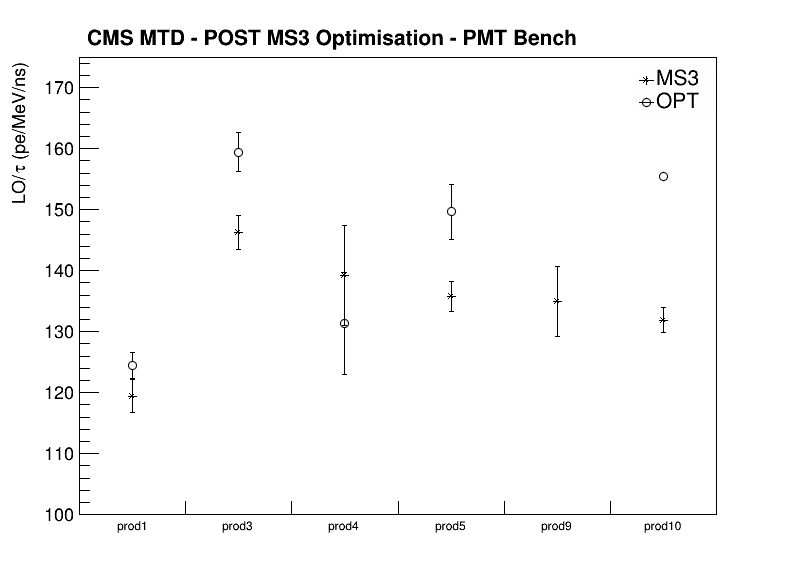

In [10]:
g['lyDT_MS3'].Draw("AP*")
g['lyDT_MS3'].GetHistogram().GetYaxis().SetLimits(100,1750)
g['lyDT_MS3'].GetHistogram().GetYaxis().SetRangeUser(100,175)
g['lyDT_MS3'].GetHistogram().GetYaxis().SetTitle("LO/#tau (pe/MeV/ns)")
g['lyDT_OPT'].SetMarkerStyle(24)
g['lyDT_OPT'].SetMarkerSize(1.2)
g['lyDT_OPT'].Draw("PSAME")
l.Draw()
t.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - PMT Bench')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_lyDT_PMT_byProd.%s'%ext)

Info in <TCanvas::Print>: png file plots/LYSO_OPT_lyNorm_PMT_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_lyNorm_PMT_byProd.pdf has been created


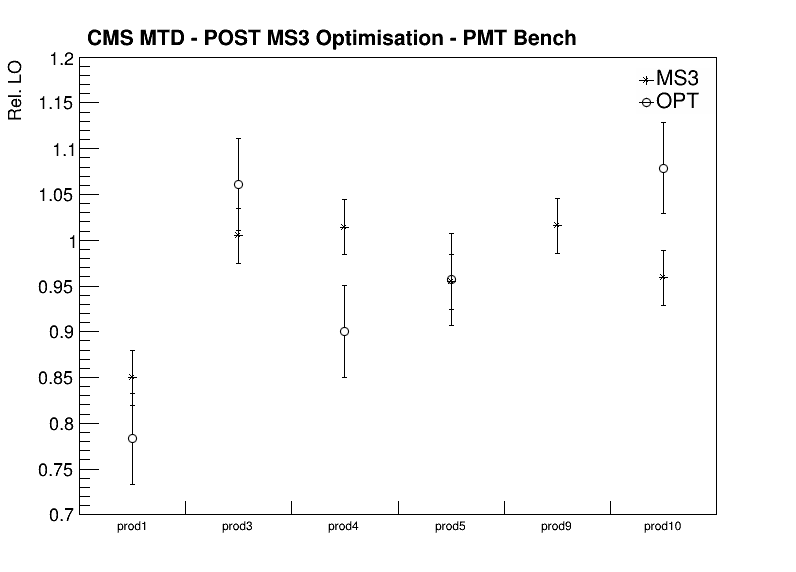

In [17]:
g['lyNorm_MS3'].Draw("AP*")
g['lyNorm_MS3'].GetHistogram().GetYaxis().SetLimits(0.7,1.2)
g['lyNorm_MS3'].GetHistogram().GetYaxis().SetRangeUser(0.7,1.2)
g['lyNorm_MS3'].GetHistogram().GetYaxis().SetTitle("Rel. LO")
g['lyNorm_OPT'].SetMarkerStyle(24)
g['lyNorm_OPT'].SetMarkerSize(1.2)
g['lyNorm_OPT'].Draw("PSAME")
l.Draw()
t.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - PMT Bench')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_lyNorm_PMT_byProd.%s'%ext)

In [12]:
fOut=R.TFile('LYSO_Optimisation.root','RECREATE')
for hn,h in g.items():
    h.Write(hn)
fOut.Close()